 **Socar Hackathon  - Risk Takers team**



**AI-based software energy solution**

# Data pre-processing part 1

In [43]:
pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 5.0 MB/s 
     |████████████████████████████████| 569 kB 47.4 MB/s 
     |████████████████████████████████| 197 kB 75.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 47 kB 5.6 MB/s 
     |████████████████████████████████| 9.9 MB 58.3 MB/s 
     |████████████████████████████████| 470 kB 60.0 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 64 kB 3.9 MB/s 
     |████████████████████████████████| 357 kB 61.1 MB/s 
     |████████████████████████████████| 136 kB 67.9 MB/s 
     |████████████████████████████████| 1.6 MB 63.0 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=ba99be661a000e20743c3e87b2578fbec6c435bd6694d921112c3392f4a64206
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c6

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.DataFrame()

In [7]:
df["Gün çıxma"]=list(pd.date_range("05:10", "08:00", freq="1min").time)[::-1]*30
df["Gün batma"]=list(pd.date_range("17:24", "20:14", freq="1min").time)*30

In [8]:
df["Tarix"]=pd.date_range(start='1/1/2021', periods=df.shape[0], freq='H')

In [9]:
hava = ['çiskin', 'yağışlı', 'günəşli', 'qarlı', 'duman']
df["Hava şəraiti"]=np.random.choice(hava, df.shape[0], p=[0.03, 0.1, 0.835, 0.03,0.005])

In [10]:
df["Month"]=df["Tarix"].apply(lambda x: x.month)

In [11]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Qış', 1:'Qış', 2:'Qış',
            3:'Yaz', 4:'Yaz', 5:'Yaz',
            6:'Yay', 7:'Yay', 8:'Yay',
            9:'Payız', 10:'Payız', 11:'Payız'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

In [12]:
season_list = []
hemisphere = 'Northern'
for month in df['Month']:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
df['Fəsil'] = season_list

In [13]:
df["Panel sayı"]=np.random.randint(10, high=30, size=df.shape[0], dtype=int)
#df["Panel ölçüsü"]=np.random.randint(10, high=30, size=df.shape[0], dtype=int)
hava =[40,60,80,100,200,400]
df["Panel gücü"]=np.random.choice(hava, df.shape[0], p=[0.20, 0.20, 0.20, 0.20,0.1,0.1])

In [14]:
df["Month"]=df["Tarix"].apply(lambda x: x.month)
df["Day"]=df["Tarix"].apply(lambda x: x.day)
df["Hour"]=df["Tarix"].apply(lambda x: x.hour)

In [15]:
df["Gün çıxa saat"]=df["Gün çıxma"].apply(lambda x: x.hour)
df["Gün bata saat"]=df["Gün batma"].apply(lambda x: x.hour)

In [16]:
df.head()

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Month,Fəsil,Panel sayı,Panel gücü,Day,Hour,Gün çıxa saat,Gün bata saat
0,08:00:00,17:24:00,2021-01-01 00:00:00,günəşli,1,Qış,16,60,1,0,8,17
1,07:59:00,17:25:00,2021-01-01 01:00:00,günəşli,1,Qış,20,80,1,1,7,17
2,07:58:00,17:26:00,2021-01-01 02:00:00,günəşli,1,Qış,16,200,1,2,7,17
3,07:57:00,17:27:00,2021-01-01 03:00:00,günəşli,1,Qış,25,80,1,3,7,17
4,07:56:00,17:28:00,2021-01-01 04:00:00,çiskin,1,Qış,15,80,1,4,7,17


In [17]:
energy=pd.read_excel(r"/content/energy.xlsx")

In [20]:
energy.sample(5)

,Month,Day,Hour,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
453,1,19,21,0,0,-1.8,8.1,0.000,-1.800,0.000,0.000
8219,12,9,11,193,198,1.1,1.3,367.560,11.821,1337.296,1284.526
286,1,12,22,0,0,3.6,4.0,0.000,3.600,0.000,0.000
184,1,8,16,62,13,-3.3,0.0,36.285,-4.162,127.458,104.683
6311,9,20,23,0,0,20.5,8.0,0.000,20.500,0.000,0.000


In [23]:
data=df.merge(energy[['Month', 'Day', 'Hour', 'AC System Output (W)']], how="left", on=['Month', 'Day', 'Hour'])

In [24]:
data.sample(1000)

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Month,Fəsil,Panel sayı,Panel gücü,Day,Hour,Gün çıxa saat,Gün bata saat,AC System Output (W)
966,06:09:00,19:15:00,2021-02-10 06:00:00,günəşli,2,Qış,18,80,10,6,6,19,0.000
4180,06:44:00,18:40:00,2021-06-24 04:00:00,qarlı,6,Yay,13,80,24,4,6,18,0.000
797,06:07:00,19:17:00,2021-02-03 05:00:00,yağışlı,2,Qış,21,40,3,5,6,19,0.000
455,06:07:00,19:17:00,2021-01-19 23:00:00,günəşli,1,Qış,23,60,19,23,6,19,0.000
786,06:18:00,19:06:00,2021-02-02 18:00:00,günəşli,2,Qış,11,40,2,18,6,19,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,06:36:00,18:48:00,2021-07-30 03:00:00,günəşli,7,Yay,12,60,30,3,6,18,0.000
1927,07:14:00,18:10:00,2021-03-22 07:00:00,günəşli,3,Yaz,27,100,22,7,7,18,558.273
1015,05:20:00,20:04:00,2021-02-12 07:00:00,günəşli,2,Qış,25,40,12,7,5,20,298.510
2425,07:29:00,17:55:00,2021-04-12 01:00:00,yağışlı,4,Yaz,21,60,12,1,7,17,0.000


In [25]:
def energy(x,y,z):
  z= (z/4000)+0.00001
  n=np.log(x*y*z)
  if n<0:
    return 0 
  return n

In [26]:
def energy(x,y,z):
  z= (z/4000)+0.00001
  return x*y*z

In [27]:
data["Günəş enerjisi"]= [energy(x,y,z) for x,y,z in zip(data["Panel sayı"], data["Panel gücü"], data["AC System Output (W)"])]

In [28]:
data["Günəş enerjisi"].max()

5955.482400000001

In [29]:
data.rename(columns={"Day":"Tarix_gün", "Hour":"Tarix_saat", "Month":"Tarix_ay"}, inplace=True)

In [30]:
data.head()

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,AC System Output (W),Günəş enerjisi
0,08:00:00,17:24:00,2021-01-01 00:00:00,günəşli,1,Qış,16,60,1,0,8,17,0.0,0.0096
1,07:59:00,17:25:00,2021-01-01 01:00:00,günəşli,1,Qış,20,80,1,1,7,17,0.0,0.0160
2,07:58:00,17:26:00,2021-01-01 02:00:00,günəşli,1,Qış,16,200,1,2,7,17,0.0,0.0320
3,07:57:00,17:27:00,2021-01-01 03:00:00,günəşli,1,Qış,25,80,1,3,7,17,0.0,0.0200
4,07:56:00,17:28:00,2021-01-01 04:00:00,çiskin,1,Qış,15,80,1,4,7,17,0.0,0.0120


In [31]:
data.dtypes

Gün çıxma                       object
Gün batma                       object
Tarix                   datetime64[ns]
Hava şəraiti                    object
Tarix_ay                        object
Fəsil                           object
Panel sayı                       int64
Panel gücü                       int64
Tarix_gün                       object
Tarix_saat                      object
Gün çıxa saat                    int64
Gün bata saat                    int64
AC System Output (W)           float64
Günəş enerjisi                 float64
dtype: object

In [32]:
data["Panel gücü"]=data["Panel gücü"].astype("category")

In [33]:
data["Tarix_gün"]=data["Tarix_gün"].astype("int32")

In [34]:
data["Tarix_saat"]=data["Tarix_saat"].astype("int32")

In [35]:
data.dtypes

Gün çıxma                       object
Gün batma                       object
Tarix                   datetime64[ns]
Hava şəraiti                    object
Tarix_ay                        object
Fəsil                           object
Panel sayı                       int64
Panel gücü                    category
Tarix_gün                        int32
Tarix_saat                       int32
Gün çıxa saat                    int64
Gün bata saat                    int64
AC System Output (W)           float64
Günəş enerjisi                 float64
dtype: object

In [36]:
a1=pd.get_dummies(data.iloc[:, 3:])

In [37]:
a1.head()

,Panel sayı,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,AC System Output (W),Günəş enerjisi,Hava şəraiti_duman,Hava şəraiti_günəşli,Hava şəraiti_qarlı,...,Tarix_ay_8,Fəsil_Qış,Fəsil_Yay,Fəsil_Yaz,Panel gücü_40,Panel gücü_60,Panel gücü_80,Panel gücü_100,Panel gücü_200,Panel gücü_400
0,16,1,0,8,17,0.0,0.0096,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,20,1,1,7,17,0.0,0.0160,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,16,1,2,7,17,0.0,0.0320,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,25,1,3,7,17,0.0,0.0200,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,15,1,4,7,17,0.0,0.0120,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [38]:
a1.columns

Index(['Panel sayı', 'Tarix_gün', 'Tarix_saat', 'Gün çıxa saat',
       'Gün bata saat', 'AC System Output (W)', 'Günəş enerjisi',
       'Hava şəraiti_duman', 'Hava şəraiti_günəşli', 'Hava şəraiti_qarlı',
       'Hava şəraiti_yağışlı', 'Hava şəraiti_çiskin', 'Tarix_ay_1',
       'Tarix_ay_2', 'Tarix_ay_3', 'Tarix_ay_4', 'Tarix_ay_5', 'Tarix_ay_6',
       'Tarix_ay_7', 'Tarix_ay_8', 'Fəsil_Qış', 'Fəsil_Yay', 'Fəsil_Yaz',
       'Panel gücü_40', 'Panel gücü_60', 'Panel gücü_80', 'Panel gücü_100',
       'Panel gücü_200', 'Panel gücü_400'],
      dtype='object')

In [39]:
Final_data=a1[['Panel sayı', 'Tarix_gün', 'Tarix_saat', 'Gün çıxa saat',
       'Gün bata saat',
       'Hava şəraiti_duman', 'Hava şəraiti_günəşli', 'Hava şəraiti_qarlı',
       'Hava şəraiti_yağışlı', 'Hava şəraiti_çiskin', 'Tarix_ay_1',
       'Tarix_ay_2', 'Tarix_ay_3', 'Tarix_ay_4', 'Tarix_ay_5', 'Tarix_ay_6',
       'Tarix_ay_7', 'Tarix_ay_8', 'Fəsil_Qış', 'Fəsil_Yay', 'Fəsil_Yaz',
       'Panel gücü_40', 'Panel gücü_60', 'Panel gücü_80', 'Panel gücü_100',
       'Panel gücü_200', 'Panel gücü_400', 'Günəş enerjisi']]

# Data pre-processing part 2

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["Hava şəraiti"])

data["Hava şəraiti"]=le.transform(data["Hava şəraiti"])

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["Fəsil"])

data["Fəsil"]=le.transform(data["Fəsil"])

In [85]:
data_final=data[['Hava şəraiti', 'Tarix_ay', 'Fəsil',
       'Panel sayı', 'Panel gücü', 'Tarix_gün', 'Tarix_saat', 'Günəş enerjisi']]

In [87]:
data_final.head()

,Panel sayı,Panel gücü,Gün çıxa saat,Gün bata saat,Hava şəraiti_duman,Hava şəraiti_günəşli,Hava şəraiti_qarlı,Hava şəraiti_yağışlı,Hava şəraiti_çiskin,Tarix_ay_1,...,Tarix_saat_15,Tarix_saat_16,Tarix_saat_17,Tarix_saat_18,Tarix_saat_19,Tarix_saat_20,Tarix_saat_21,Tarix_saat_22,Tarix_saat_23,Günəş enerjisi
0,25,40,8,17,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
1,12,200,7,17,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
2,22,80,7,17,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
3,25,80,7,17,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
4,19,100,7,17,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0


# Testing AI models 

In [ ]:
# Loading Libraries

import pandas as pd

import numpy as np

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

import datetime

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

from keras.models import Sequential

from keras.layers import Dense

from prettytable import PrettyTable

In [27]:
data_final.head()

,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,Günəş enerjisi
0,1,1,0,12,40,1,0,8,17,0.0
1,3,1,0,13,80,1,1,7,17,0.0
2,1,1,0,27,80,1,2,7,17,0.0
3,1,1,0,17,40,1,3,7,17,0.0
4,1,1,0,24,80,1,4,7,17,0.0


In [ ]:
df=data_final.copy()
X=data_final.drop(["Günəş enerjisi"],axis=1)

y=data_final['Günəş enerjisi']

# Data Splitting and Scaling

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

# Model Building

def train_ml_model(x,y,model_type):

    if model_type=='lr':

        model=LinearRegression()

    elif model_type=='xgb':

        model=XGBRegressor()

    elif model_type=='rf':

        model=RandomForestRegressor()

    model.fit(x,y)#np.log(y))

    return model

def model_evaluate(model,x,y):

    predictions=model.predict(x)

    #predictions=np.exp(predictions)

    mse=mean_squared_error(y,predictions)

    mae=mean_absolute_error(y,predictions)

    mape=mean_absolute_percentage_error(y,predictions)

    msle=mean_squared_log_error(y,predictions)

    mse=round(mse,2)

    mae=round(mae,2)

    mape=round(mape,2)

    msle=round(msle,2)

    return [mse,mae,mape,msle]

model_lr=train_ml_model(X_train_scaled,y_train,'lr')

model_xgb=train_ml_model(X_train_scaled,y_train,'xgb')

model_rf=train_ml_model(X_train_scaled,y_train,'rf')

## Deep Learning



[17:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
### Small Network

model_dl_small=Sequential()

model_dl_small.add(Dense(16,input_dim=X_train_scaled.shape[1],activation='relu'))

model_dl_small.add(Dense(8,activation='relu'))

model_dl_small.add(Dense(4,activation='relu'))

model_dl_small.add(Dense(1,activation='linear'))

model_dl_small.compile(loss='mean_squared_error',optimizer='adam')

model_dl_small.summary()

epochs=10

batch_size=10

model_dl_small.fit(X_train_scaled,y_train,verbose=1,validation_data=(X_test_scaled,y_test),epochs=epochs,batch_size=batch_size)

#plot the loss and validation loss of the dataset

history_df = pd.DataFrame(model_dl_small.history.history)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
411/411 [==============================] - 2s 3ms/step - loss: 10.7560 - val_loss: 9.0254
Epoch 2/10
411/411 [==============================] - 1s 2ms/step - loss: 7.8578 - val_lo

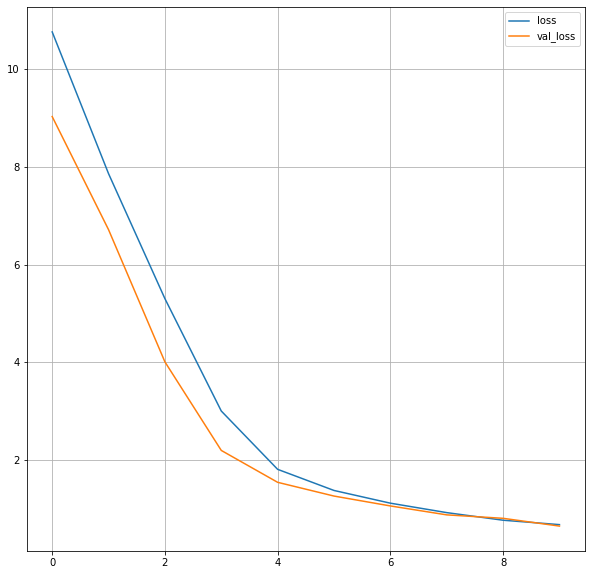

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history_df['loss'], label='loss')

plt.plot(history_df['val_loss'], label='val_loss')

#plt.xticks(np.arange(1,epochs+1))

#plt.yticks(np.arange(1,max(history_df['loss']),0.5))

plt.legend()

plt.grid()

plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
411/411 [==============================] - 2s 3ms/step - loss: 7.4159 - val_loss: 2.4474
Epoch 2/10
411/411 [==============================] - 1s 2ms/step - loss: 1.7232 - v

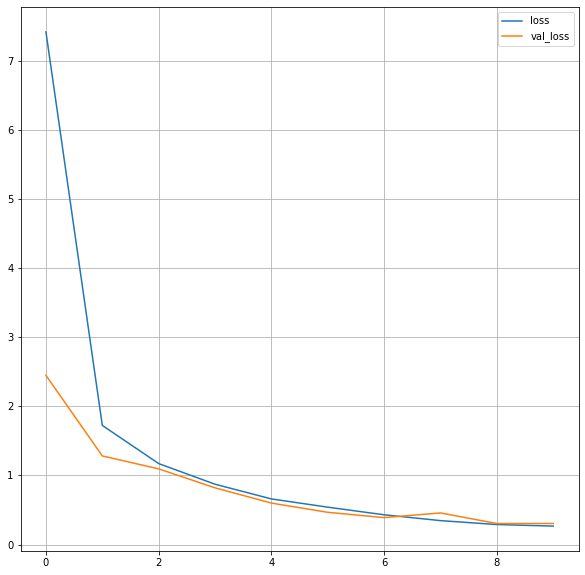

In [ ]:
### Large Network

model_dl_large=Sequential()

model_dl_large.add(Dense(64,input_dim=X_train_scaled.shape[1],activation='relu'))

model_dl_large.add(Dense(32,activation='relu'))

model_dl_large.add(Dense(16,activation='relu'))

model_dl_large.add(Dense(1,activation='linear'))

model_dl_large.compile(loss='mean_squared_error',optimizer='adam')

model_dl_large.summary()

epochs=10

batch_size=10

model_dl_large.fit(X_train_scaled,y_train,verbose=1,validation_data=(X_test_scaled,y_test),epochs=epochs,batch_size=batch_size)

#plot the loss and validation loss of the dataset

history_df = pd.DataFrame(model_dl_large.history.history)

plt.figure(figsize=(10,10))

plt.plot(history_df['loss'], label='loss')

plt.plot(history_df['val_loss'], label='val_loss')

#plt.xticks(np.arange(1,epochs+1,2))

#plt.yticks(np.arange(1,max(history_df['loss']),0.5))

plt.legend()

plt.grid()

In [ ]:
min(y_test)

0.0

In [ ]:
model_evaluate(model_lr,X_test_scaled,y_test)

[8.94, 2.87, 6223457874069559.0, 1.04]

In [ ]:
y_pred=model_xgb.predict(X_test_scaled)

In [ ]:
min(y_pred)

-0.5951605

+-------+------+------+--------------------+------+
| Model | MSE  | MAE  |        MAPE        | MSLE |
+-------+------+------+--------------------+------+
|   LR  | 8.94 | 2.87 | 6223457874069559.0 | 1.04 |
|   RF  | 0.03 | 0.07 |  4727216319436.54  | 0.0  |
+-------+------+------+--------------------+------+


([<matplotlib.axis.XTick at 0x7f0df1041290>,
 <a list of 20 Text major ticklabel objects>)

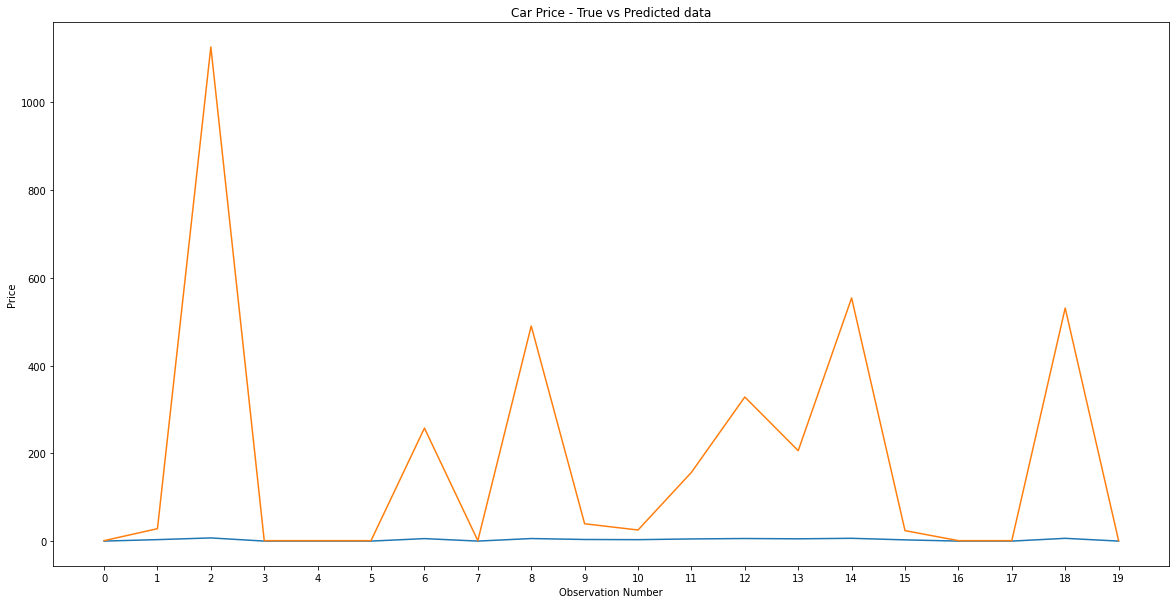

In [ ]:


summary=PrettyTable(['Model','MSE','MAE','MAPE','MSLE'])

summary.add_row(['LR']+model_evaluate(model_lr,X_test_scaled,y_test))

#summary.add_row(['XGB']+model_evaluate(model_xgb,X_test_scaled,y_test))

summary.add_row(['RF']+model_evaluate(model_rf,X_test_scaled,y_test))

#summary.add_row(['DL_SMALL']+model_evaluate(model_dl_small,X_test_scaled,y_test))

#summary.add_row(['DL_LARGE']+model_evaluate(model_dl_large,X_test_scaled,y_test))

print(summary)

y_pred=np.exp(model_rf.predict(X_test_scaled))

number_of_observations=20

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))

plt.plot(x_ax, y_test[:number_of_observations], label="True")

plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")

plt.title("Car Price - True vs Predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.xticks(np.arange(number_of_observations))


In [ ]:
# # Stacked LSTM for international airline passengers problem with memory
# import numpy as np
# import matplotlib.pyplot as plt
# from pandas import read_csv
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# # convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset.iloc[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset.iloc[i + look_back, 0])
# 	return np.array(dataX), np.array(dataY)
# # fix random seed for reproducibility
# tf.random.set_seed(7)
# # load the dataset
# #dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
# dataset=data_final.copy()
# #dataset = dataframe.values
# #dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset.iloc[:, :-1] = scaler.fit_transform(dataset.iloc[:, :-1])
# # split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]

In [ ]:
# # reshape into X=t and Y=t+1
# look_back = 3
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# # create and fit the LSTM network
# batch_size = 1
# model = Sequential()
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# for i in range(5):
# 	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
# 	model.reset_states()

3433/3433 - 21s - loss: 0.0400 - 21s/epoch - 6ms/step
3433/3433 - 14s - loss: 0.0391 - 14s/epoch - 4ms/step
3433/3433 - 11s - loss: 0.0390 - 11s/epoch - 3ms/step
3433/3433 - 11s - loss: 0.0390 - 11s/epoch - 3ms/step
3433/3433 - 11s - loss: 0.0389 - 11s/epoch - 3ms/step


In [ ]:
# # make predictions
# trainPredict = model.predict(trainX, batch_size=batch_size)
# model.reset_states()
# testPredict = model.predict(testX, batch_size=batch_size)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# # calculate root mean squared error
# trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
target_y=data_final["Günəş enerjisi"]
X_feat=data_final.iloc[:, :-1]

In [ ]:
sc=StandardScaler()
X_ft=sc.fit_transform(X_feat.values)
X_ft=pd.DataFrame(columns=X_feat.columns,
                  data=X_ft, index=X_feat.index)

In [ ]:
def lstm_split(data, n_steps):
  X,y =[], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps, :-1])
    y.append(data[i+n_steps-1,-1])
  return np.array(X), np.array(y)

In [ ]:
X1, y1=lstm_split(data_final.values, n_steps=1)

In [ ]:
train_split=0.8
split_idx=int(np.ceil(len(X1)*train_split))
data_index=data_final.index

In [ ]:
X_train, X_test=X1[:split_idx], X1[split_idx:]
y_train, y_test=y1[:split_idx], y1[split_idx:]

In [ ]:
X_train_date, X_test_date=data_index[:split_idx], data_index[split_idx:]
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(5130, 1, 9) (4104, 1, 9) (1026, 1, 9) (1026,)


In [ ]:
lstm=Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 32)             5376      
                                                                 
 dense_10 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(4104,)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1,shuffle=False)

Epoch 1/100
1026/1026 [==============================] - 4s 2ms/step - loss: 7.3711
Epoch 2/100
1026/1026 [==============================] - 3s 3ms/step - loss: 4.0193
Epoch 3/100
1026/1026 [==============================] - 2s 2ms/step - loss: 3.4256
Epoch 4/100
1026/1026 [==============================] - 2s 2ms/step - loss: 3.2460
Epoch 5/100
1026/1026 [==============================] - 2s 2ms/step - loss: 3.1523
Epoch 6/100
1026/1026 [==============================] - 2s 2ms/step - loss: 3.1019
Epoch 7/100
1026/1026 [==============================] - 2s 2ms/step - loss: 3.0631
Epoch 8/100
1026/1026 [==============================] - 2s 2ms/step - loss: 3.0234
Epoch 9/100
1026/1026 [==============================] - 3s 2ms/step - loss: 2.9922
Epoch 10/100
1026/1026 [==============================] - 2s 2ms/step - loss: 2.9664
Epoch 11/100
1026/1026 [==============================] - 3s 2ms/step - loss: 2.9418
Epoch 12/100
1026/1026 [==============================] - 3s 2ms/step - lo

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
y_pred=lstm.predict(X_train)
y_pred2=lstm.predict(X_test)

In [ ]:
y_test

array([0.       , 0.       , 0.       , ..., 6.623583 , 5.0192842,
       6.6770806], dtype=float32)

In [ ]:
y_pred[:,0][:, 0]

array([-0.37916994,  0.23206711, -0.1351757 , ...,  1.1659902 ,
        0.3142854 , -0.09060955], dtype=float32)

In [ ]:
rmse=mean_squared_error(y_test, y_pred2[:,0][:, 0], squared=False)

In [ ]:
data_final2=data.iloc[:split_idx,:]
data_final3=data.iloc[split_idx:,:]

In [ ]:
data_final2["prediction"]= y_pred[:,0][:, 0]
data_final3["prediction"]= y_pred2[:,0][:, 0]

In [ ]:
range1=[i for i in range(0,data_final2.shape[0],120)] 
range2=[i for i in range(0,data_final3.shape[0],120)]

In [ ]:
data_final2=data_final2.iloc[range1,:]
data_final3=data_final3.iloc[range2,:]

In [ ]:
data_final2.head()

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,AC System Output (W),Günəş enerjisi,prediction
0,08:00:00,17:24:00,2021-01-01,1,1,0,15,40,1,0,8,17,0.0,0.0,-0.379170
120,06:00:00,19:24:00,2021-01-06,1,1,0,25,60,6,0,6,19,0.0,0.0,-0.008954
240,06:51:00,18:33:00,2021-01-11,1,1,0,22,60,11,0,6,18,0.0,0.0,-0.035495
360,07:42:00,17:42:00,2021-01-16,1,1,0,16,400,16,0,7,17,0.0,0.0,0.740698
480,05:42:00,19:42:00,2021-01-21,1,1,0,22,400,21,0,5,19,0.0,0.0,0.757448


In [ ]:
data_final2=data_final2[["Tarix","prediction" ]]
data_final2.index=data_final2["Tarix"]
data_final2.drop(columns=["Tarix"], inplace=True)

data_final3=data_final3[["Tarix","prediction" ]]
data_final3.index=data_final3["Tarix"]
data_final3.drop(columns=["Tarix"], inplace=True)

In [ ]:
data_final2.head()

,prediction
Tarix,
2021-01-01,-0.379170
2021-01-06,-0.008954
2021-01-11,-0.035495
2021-01-16,0.740698
2021-01-21,0.757448


In [ ]:
X_train.shape

(4104, 1, 9)

In [ ]:
split_idx

4104

In [53]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [ ]:
"""

In [62]:
df= pd.read_excel(r"/content/2023_energy.xlsx")

In [63]:
df.head()

,Tarix,Sample,Energy
0,2022_1,Train,233.144878
1,2022_2,Train,317.134056
2,2022_3,Train,389.939527
3,2022_4,Train,386.078729
4,2022_5,Train,462.096811


In [64]:
df_train=df[df.Sample=="Train"]
df_test=df[df.Sample!="Train"]

In [65]:
df_test

,Tarix,Sample,Energy
12,2023_1,Forecast,302.653414
13,2023_2,Forecast,388.890471
14,2023_3,Forecast,426.810041
15,2023_4,Forecast,466.496547
16,2023_5,Forecast,570.954572
17,2023_6,Forecast,619.177444
18,2023_7,Forecast,567.971700
19,2023_8,Forecast,517.395975
20,2023_9,Forecast,473.152478
21,2023_10,Forecast,393.339649


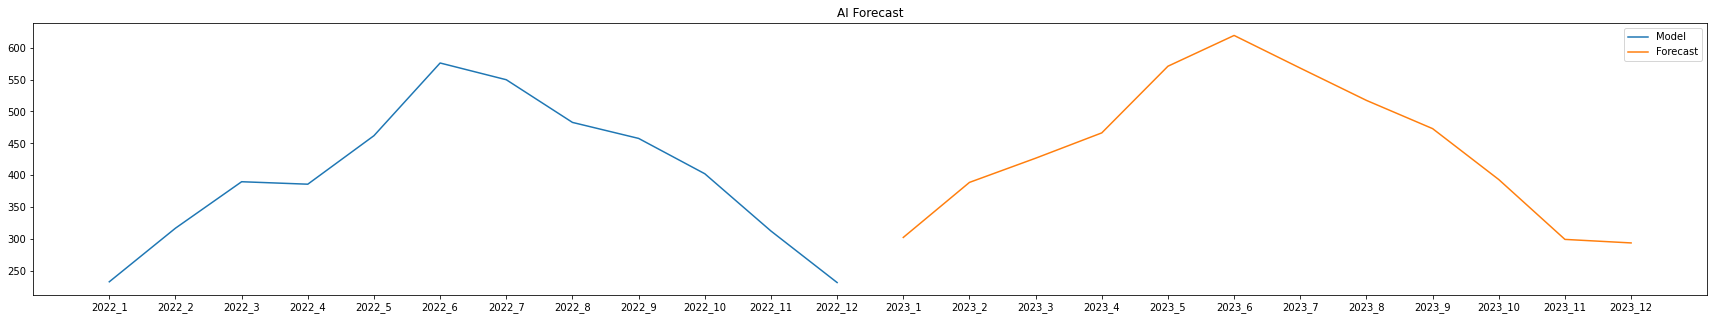

In [68]:
#dd= np.asarray(Train.Count) 
#y_hat = valid.copy() 
#y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(30,5)) 
plt.plot(df_train.Tarix, df_train['Energy'], label='Model') 
plt.plot(df_test.Tarix,df_test['Energy'], label='Forecast') 
#plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("AI Forecast") 
plt.show()

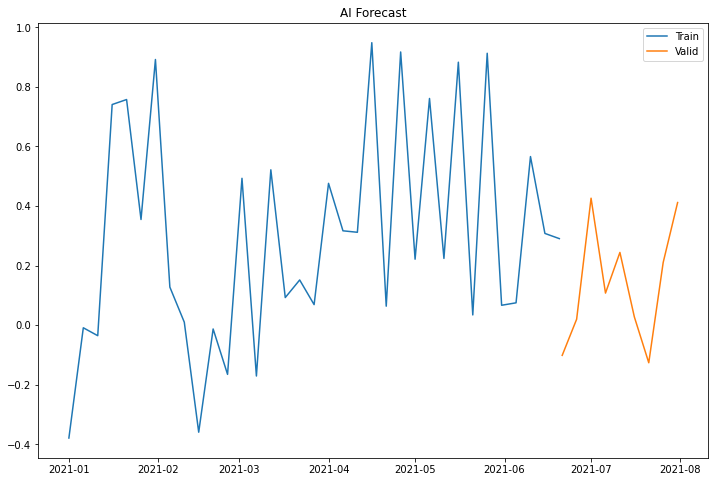

In [ ]:
#dd= np.asarray(Train.Count) 
#y_hat = valid.copy() 
#y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(data_final2.index, data_final2['prediction'], label='Train') 
plt.plot(data_final3.index,data_final3['prediction'], label='Valid') 
#plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("AI Forecast") 
plt.show()

In [30]:
y_train

0       7.2500
1       7.9250
2       8.0500
3       8.4583
4      51.8625
        ...   
686    29.1250
687    30.0000
688    23.4500
689    30.0000
690     7.7500
Name: Fare, Length: 691, dtype: float64

In [31]:
data_final.head()

,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,Günəş enerjisi
0,1,1,0,12,40,1,0,8,17,0.0
1,3,1,0,13,80,1,1,7,17,0.0
2,1,1,0,27,80,1,2,7,17,0.0
3,1,1,0,17,40,1,3,7,17,0.0
4,1,1,0,24,80,1,4,7,17,0.0


# AI Modeling and dashboards

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Final_data.iloc[:, :-1],Final_data["Günəş enerjisi"] , test_size=0.30, random_state=42)

In [41]:
X_train.head()

,Panel sayı,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,Hava şəraiti_duman,Hava şəraiti_günəşli,Hava şəraiti_qarlı,Hava şəraiti_yağışlı,Hava şəraiti_çiskin,...,Tarix_ay_8,Fəsil_Qış,Fəsil_Yay,Fəsil_Yaz,Panel gücü_40,Panel gücü_60,Panel gücü_80,Panel gücü_100,Panel gücü_200,Panel gücü_400
1992,21,25,0,6,19,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4580,14,10,20,5,19,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
217,12,10,1,7,18,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4560,14,10,0,6,19,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3933,23,13,21,8,17,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [69]:
from sklearn.ensemble import RandomForestRegressor

from explainerdashboard import RegressionExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_fare, feature_descriptions

#X_train, y_train, X_test, y_test = titanic_fare()
model = RandomForestRegressor(n_estimators=30 , max_depth=10).fit(X_train, y_train)

explainer = RegressionExplainer(model, X_test, y_test, 
                                #cats=['Fəsil', 'Hava şəraiti', 'Panel gücü'], 
                                descriptions=feature_descriptions,
                                units="W")

ExplainerDashboard(explainer).run()

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate 

<IPython.core.display.Javascript object>